#### 1.Import and store the data in a data

In [93]:
import pandas as pd
import numpy       as np
import scipy.stats as stats
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats        as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [94]:
import os
df = pd.read_csv(os.getcwd() + '/airq402.csv')

#### 2.Remove the outliers from the data

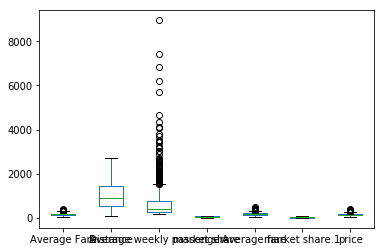

In [95]:
%matplotlib inline

df.plot(kind='box')


In [96]:
df.shape

(1000, 11)

In [97]:
def find_ouliers(x):
    q1, q3= np.percentile(df[x],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    return(upper_bound)
for col in df.columns:
    if (df[col].dtype != object):
        df = df.loc[df[col] < find_ouliers(col)]
        
df.shape

(877, 11)

#### 3.Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. 

In [98]:
import seaborn as sns
%matplotlib inline

In [101]:
X= df.iloc[:,[0,1,3,4,5,6,7,8,9,10]].values
y= df.iloc[:,2].values

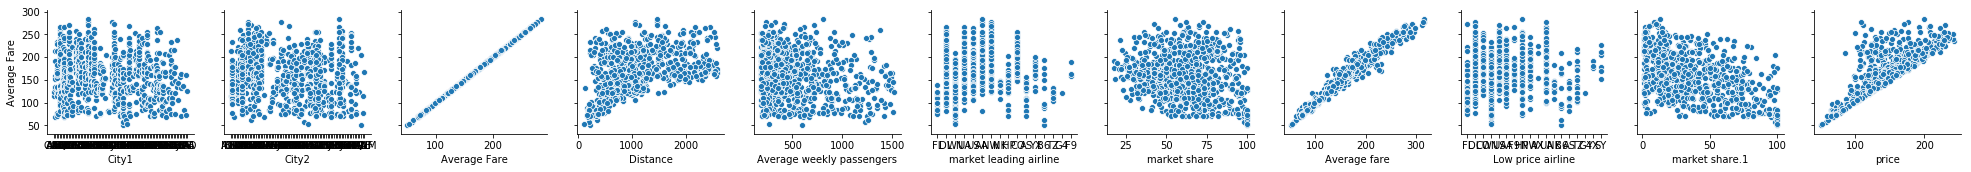

In [83]:
sns.pairplot(df,
                  y_vars=['Average Fare'],
                  x_vars=['City1', 'City2', 'Average Fare','Distance', 'Average weekly passengers',
                          'market leading airline','market share','Average fare','Low price airline',
                          'market share.1','price'])

#### 4.Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [84]:
def find_correlation(x):
    if(df[x].corr(df['Average Fare']) < 0.1): #df['Average Fare'] is dependent variable
        return(x)
        df.drop(x, axis=1)

for i in df.columns:
    if (df[i].dtype != object):
        corr = find_correlation(i)
        if(corr != None):
            df = df.drop([corr], axis=1)

df

,City1,City2,Average Fare,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42
5,ALB,FLL,135.17,1204,WN,137.97,DL,127.69
6,ALB,LAS,152.85,2237,WN,148.59,WN,148.59
7,ALB,LAX,190.73,2467,DL,205.06,US,174.00
8,ALB,MCO,129.35,1073,WN,127.69,WN,127.69
9,ALB,TPA,134.17,1130,US,132.91,DL,124.78


#### 5.Create scatter Plot of Independent Variable vs Dependent Variable.

City1
City2
Average Fare
Distance
market leading airline
Average fare
Low price airline
price


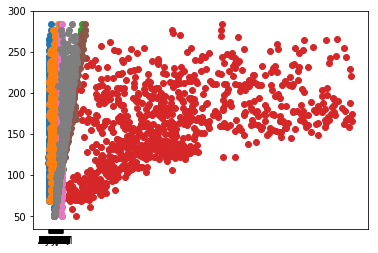

In [85]:
for i in df.columns:
    print(i)
    plt.scatter(df[i],df['Average Fare'])

#### 6.Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [86]:
df1=df.drop(['City1', 'City2', 'market leading airline', 'Low price airline'], axis=1)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df1, test_size=0.20, random_state=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
df1.dtypes

Average Fare    float64
Distance          int64
Average fare    float64
price           float64
dtype: object

#### 7.Print the coefficients & intercepts of the linear regression model

In [87]:
print("the coefficient for Average Fare", regression_model.coef_[0])
print("the coefficient for Distance", regression_model.coef_[1])
print("the coefficient for Average fare", regression_model.coef_[2])
print("the coefficient for price", regression_model.coef_[3])

the coefficient for Average Fare [ 1.00000000e+00 -1.08223356e-18 -1.31467476e-16 -3.85031203e-17]
the coefficient for Distance [-2.07942287e-16  1.00000000e+00  4.72640042e-16  3.20029064e-16]
the coefficient for Average fare [-6.75812432e-16 -5.04103040e-17  1.00000000e+00 -1.14476781e-16]
the coefficient for price [ 5.02527193e-16  5.49425995e-17 -4.70879446e-16  1.00000000e+00]


In [88]:
print("the intercept for Average Fare", regression_model.intercept_[0])
print("the intercept for Distance", regression_model.intercept_[1])
print("the intercept for Average fare", regression_model.intercept_[2])
print("the intercept for price", regression_model.intercept_[3])

the intercept for Average Fare 0.0
the intercept for Distance -5.684341886080801e-13
the intercept for Average fare 8.526512829121202e-14
the intercept for price 2.842170943040401e-14


#### 8.Print the accuracy of the overall model

In [89]:
regression_model.score(X_test, y_test)

1.0

In [90]:
regression_model.score(X_train, y_train)

1.0